In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pickle

# PART A

# Question - 1

In [387]:
#1.A

df_churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

#1.B

df_churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv', na_values =' ')

In [388]:
#1.C.

df_churn = pd.merge(df_churn1,df_churn2,how='outer',on='customerID')
df_churn=df_churn.drop(['customerID'], axis = 1)

In [389]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [390]:
df_churn.shape

(7043, 20)

In [391]:
df_churn1.shape

(7043, 10)

In [392]:
df_churn2.shape

(7043, 12)

In [393]:
df_churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [394]:
df_churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [395]:
print(df_churn.to_string())

      gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
0     Female              0     Yes         No       1           No  No phone service             DSL                   No                  Yes                   No                   No                   No                   No  Month-to-month              Yes           Electronic check           29.85         29.85    No
1       Male              0      No         No      34          Yes                No             DSL                  Yes                   No                  Yes                   No                   No                   No        One year               No               Mailed check           56.95       1889.50    No
2       Male              0 

In [396]:
list1 = df_churn1.columns
list2 = df_churn2.columns
list3 = df_churn.columns
for i in range(9):
    if list1[i+1] == list3[i]:
        print('Dataframe 1 column name', list1[i+1], 'present in the final Merged Dataframe')
    else:
        print('Dataframe 1 column name', list1[i+1], 'not present in the final Merged Dataframe')
print("\n\n")
for i in range(11):
    if list2[i+1] == list3[i+9]:
        print('Dataframe 2 column name', list2[i+1], 'present in the final Merged Dataframe')
    else:
        print('Dataframe 2 column name',list2[i+1], 'not present in the final Merged Dataframe')

Dataframe 1 column name gender present in the final Merged Dataframe
Dataframe 1 column name SeniorCitizen present in the final Merged Dataframe
Dataframe 1 column name Partner present in the final Merged Dataframe
Dataframe 1 column name Dependents present in the final Merged Dataframe
Dataframe 1 column name tenure present in the final Merged Dataframe
Dataframe 1 column name PhoneService present in the final Merged Dataframe
Dataframe 1 column name MultipleLines present in the final Merged Dataframe
Dataframe 1 column name InternetService present in the final Merged Dataframe
Dataframe 1 column name OnlineSecurity present in the final Merged Dataframe



Dataframe 2 column name OnlineBackup present in the final Merged Dataframe
Dataframe 2 column name DeviceProtection present in the final Merged Dataframe
Dataframe 2 column name TechSupport present in the final Merged Dataframe
Dataframe 2 column name StreamingTV present in the final Merged Dataframe
Dataframe 2 column name Streamin

# Question - 2

In [397]:
#2.A.

# Checking for total missing values in each column of df_churn
df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [398]:
# Replacing all Null values which were ' ' before in TotalCharges Column with 0

df_churn['TotalCharges']= df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].mean())

In [399]:
# Checking for invalid values in each column of df_churn

for (columnName, columnData) in df_churn.iteritems():
    print (columnName, ":", df_churn[columnName].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [400]:
#2.B.

df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [401]:
# Converting tenure column alone to float type since MonthlyCharges and TotalCharges columns are already float type
df_churn[['tenure']] = df_churn[['tenure']].astype(float)

In [402]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [403]:
df_churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [404]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

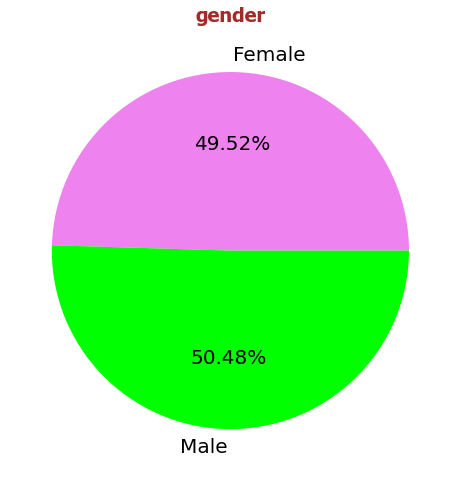

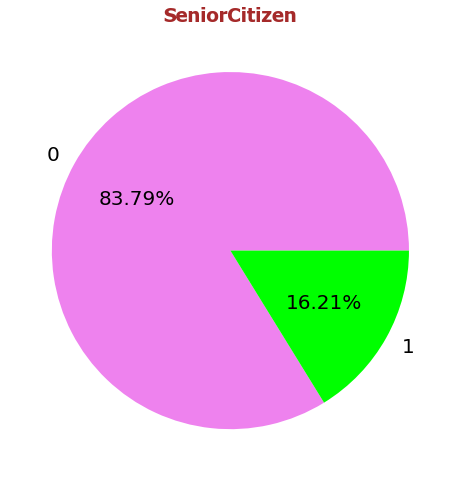

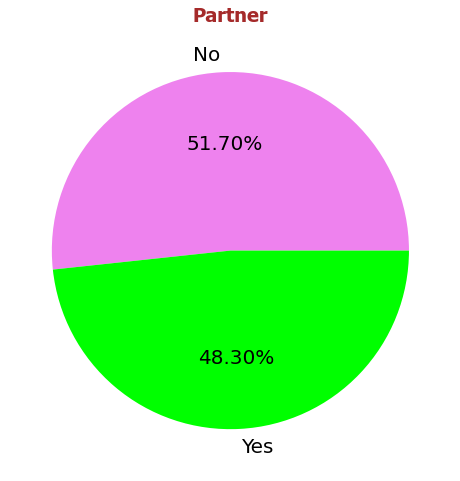

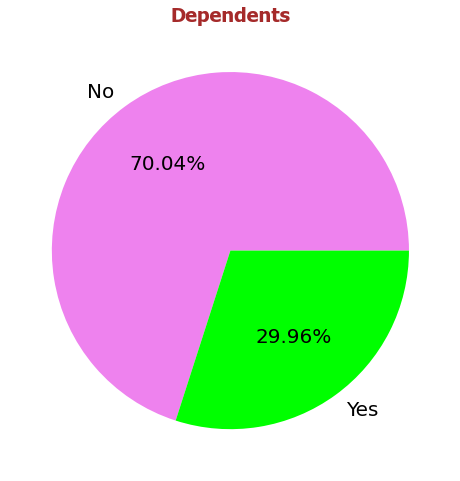

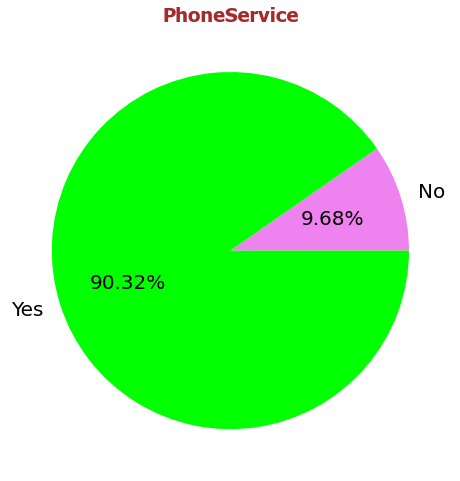

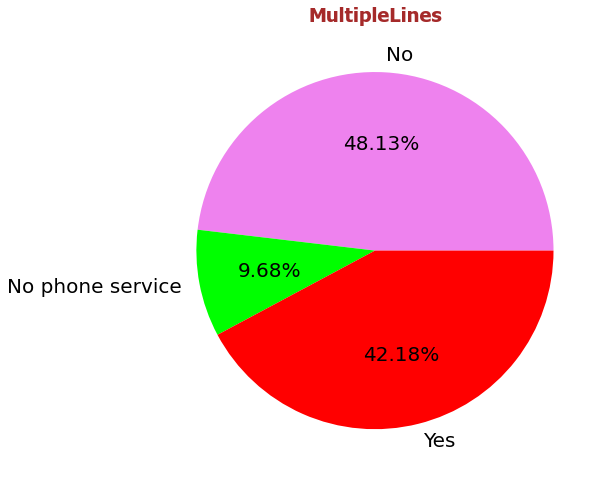

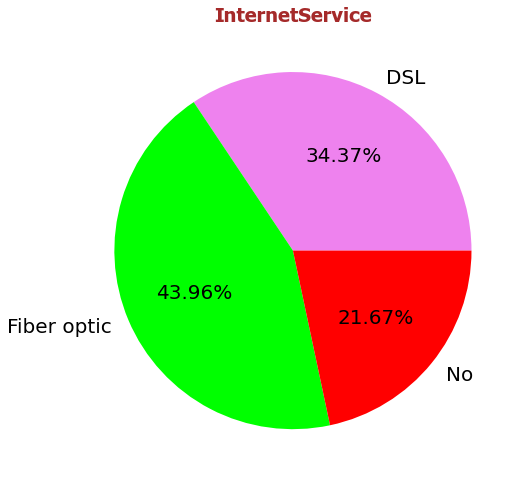

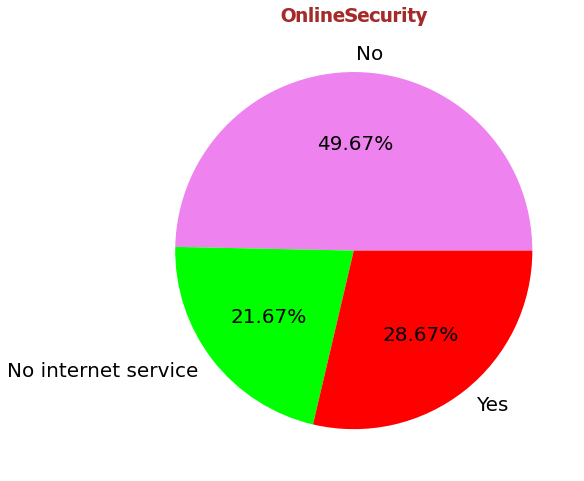

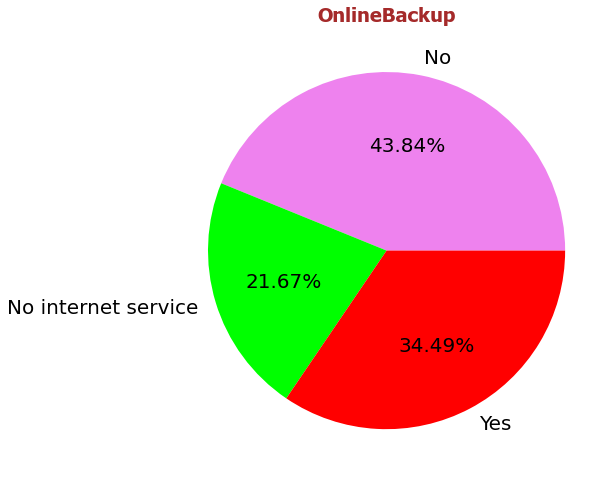

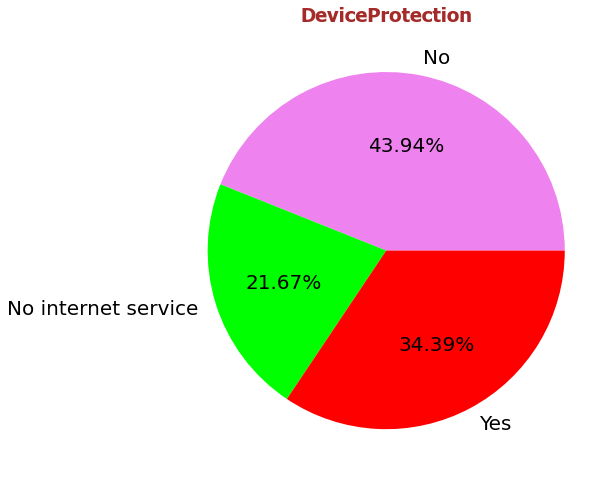

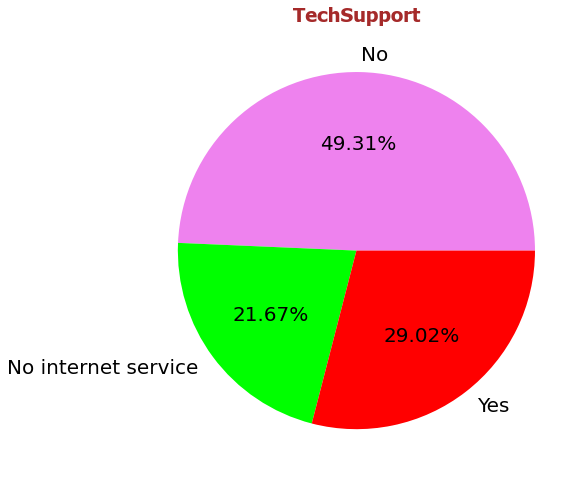

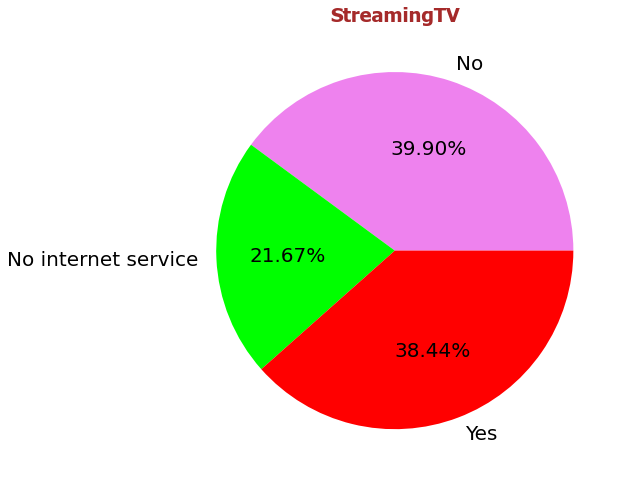

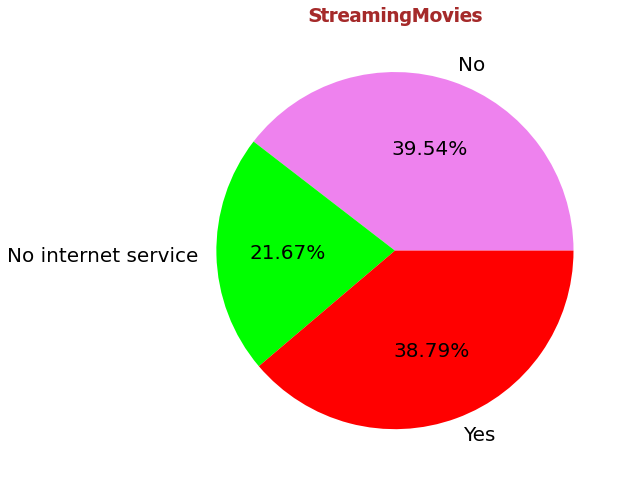

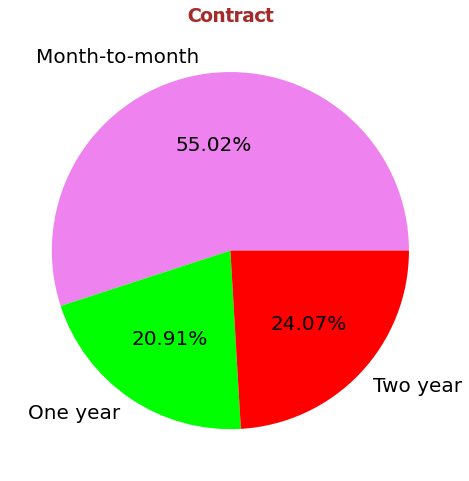

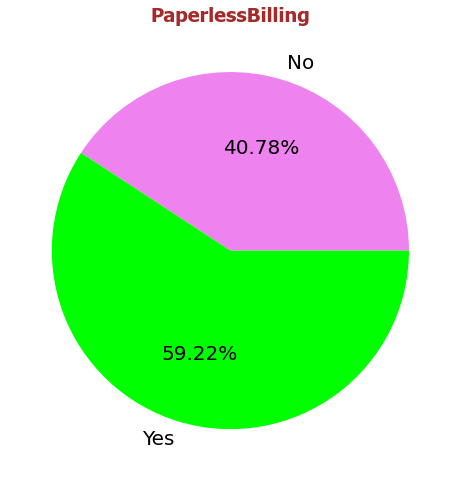

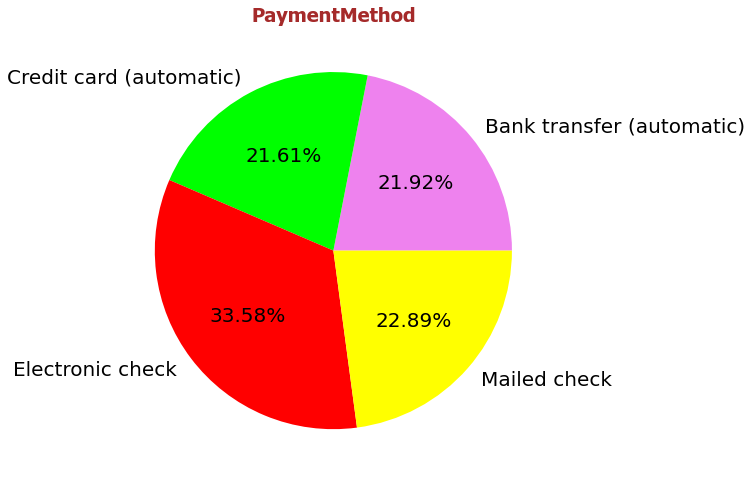

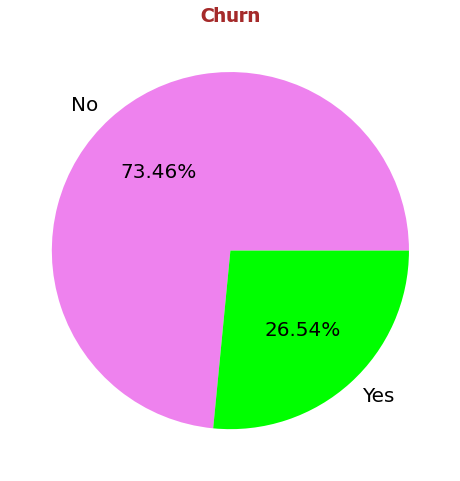

In [405]:

df_churn_cat = pd.DataFrame()
df_churn_cat = df_churn[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

def piechart(df_churn_fn):
    font1 = {'family': 'Tahoma',
        'color':  'brown',
        'weight': 'bold',
        'size': 20,
        }
    for col in df_churn_fn.columns:
        plt.figure(figsize=(8,15))
        df_churn_fn.groupby(col).size().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20},colors=['violet', 'lime','red','yellow'],label="")
        plt.title(col, fontdict = font1)
    
piechart(df_churn_cat)

In [406]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [407]:
replaceStruct = {"Partner":{"Yes":1, "No":0} ,
                 "Dependents":{"No":0, "Yes":1}, 
                 "PhoneService":{"No":0, "Yes":1},
                 "MultipleLines":{"No phone service":0, "No":1, "Yes":2},
                 "InternetService":{"No":0, "DSL":1, "Fiber optic":2},
                 "OnlineSecurity":{"No internet service":0, "No":1, "Yes":2},
                 "OnlineBackup":{"No internet service":0,"No":1, "Yes":2},
                 "DeviceProtection":{"No internet service":0, "No":1, "Yes":2},
                 "TechSupport":{"No internet service":0, "No":1, "Yes":2},
                 "StreamingTV":{"No internet service":0, "No":1, "Yes":2},
                 "StreamingMovies":{"No internet service":0, "No":1, "Yes":2},
                 "Contract":{"Month-to-month":1, "One year":2, "Two year":3}, 
                 "PaperlessBilling":{"Yes":1, "No":0},
                 "Churn":{"No":0, "Yes":1} }

oneHotCols=["gender","PaymentMethod"]

In [408]:
df_churn = df_churn.replace(replaceStruct)
df_churn = pd.get_dummies(df_churn, columns=oneHotCols, drop_first=True)
df_churn.head(10)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1.0,0,0,1,1,2,1,...,1,1,1,29.85,29.85,0,0,0,1,0
1,0,0,0,34.0,1,1,1,2,1,2,...,1,2,0,56.95,1889.50,0,1,0,0,1
2,0,0,0,2.0,1,1,1,2,2,1,...,1,1,1,53.85,108.15,1,1,0,0,1
3,0,0,0,45.0,0,0,1,2,1,2,...,1,2,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,2.0,1,1,2,1,1,1,...,1,1,1,70.70,151.65,1,0,0,1,0
5,0,0,0,8.0,1,2,2,1,1,2,...,2,1,1,99.65,820.50,1,0,0,1,0
6,0,0,1,22.0,1,2,2,1,2,1,...,1,1,1,89.10,1949.40,0,1,1,0,0
7,0,0,0,10.0,0,0,1,2,1,1,...,1,1,0,29.75,301.90,0,0,0,0,1
8,0,1,0,28.0,1,2,2,1,1,2,...,2,1,1,104.80,3046.05,1,0,0,1,0
9,0,0,1,62.0,1,1,1,2,2,1,...,1,2,0,56.15,3487.95,0,1,0,0,0


In [409]:
# 2.F.
X = df_churn.drop(['Churn'], axis=1)
y = df_churn[['Churn']]

In [410]:
XScaled = X.apply(zscore)

In [411]:
XScaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-2.061669,-0.286223,-0.099148,1.180777,-0.172426,...,-0.22154,-0.225767,-0.828207,0.829798,-1.160323,-0.994971,-1.009559,-0.525047,1.406418,-0.544807
1,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.505697,-0.286223,1.317281,-0.173655,1.182926,...,-0.22154,-0.225767,0.371271,-1.205113,-0.259629,-0.173876,0.990532,-0.525047,-0.711026,1.835513
2,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.505697,-0.286223,1.317281,1.180777,-0.172426,...,-0.22154,-0.225767,-0.828207,0.829798,-0.362660,-0.960399,0.990532,-0.525047,-0.711026,1.835513
3,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-2.061669,-0.286223,1.317281,-0.173655,1.182926,...,-0.22154,-0.225767,0.371271,-1.205113,-0.746535,-0.195400,0.990532,-0.525047,-0.711026,-0.544807
4,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.505697,0.997769,-0.099148,-0.173655,-0.172426,...,-0.22154,-0.225767,-0.828207,0.829798,0.197365,-0.941193,-1.009559,-0.525047,1.406418,-0.544807


In [412]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.20, random_state=42)

In [413]:
# XGBoost Base Model
model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [414]:
# A parameter grid for XGBoost

params = {
        'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
        'min_child_weight': [1,3,5,7,10],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.3,0.4,0.5,0.6, 0.7, 0.8, 1.0],
        'max_depth': [3,4,5,6,8,10,12,15]
        }


In [415]:
random_search = RandomizedSearchCV (model,param_distributions = params,n_iter=5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1.0],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1,
                                                  1.5, 2, 5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [416]:
# List of Best Parameter values for all XGBoost parameters, considered for the XGBoost Base Model created
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [417]:
# Best Parameter values out of the inputed parameter values to Random Search CV for XGBoost Base Model
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

<AxesSubplot:>

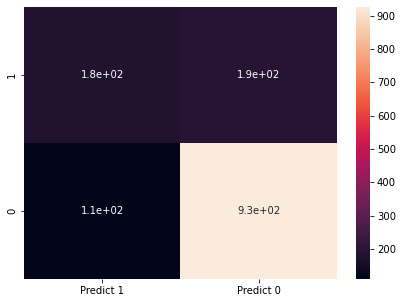

In [418]:
# Confusion Matrix for Test Data Predictions

cm = metrics.confusion_matrix(y_test, y_test_pred, labels=[1, 0])

df_churn_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_churn_cm, annot=True)

In [419]:
# Performance Metric Values For XGBoost Base Model Training and Test Set
print("Classification Report For XGBoost Base Model applied to Training Set:\n\n", classification_report(y_train,y_train_pred))
print('-'*75)
print("Classification Report For XGBoost Base Model applied to Testing Set:\n\n", classification_report(y_test,y_test_pred))

Classification Report For XGBoost Base Model applied to Training Set:

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4138
           1       0.89      0.84      0.86      1496

    accuracy                           0.93      5634
   macro avg       0.92      0.90      0.91      5634
weighted avg       0.93      0.93      0.93      5634

---------------------------------------------------------------------------
Classification Report For XGBoost Base Model applied to Testing Set:

               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [420]:
# Improving the Performance of XGBoost Model By Creating a Balanced Dataset

y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [511]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
oversample = RandomOverSampler(sampling_strategy='minority')

In [512]:
XScaled_under, y_under = undersample.fit_resample(XScaled, y)

In [513]:
XScaled_under.shape

(5607, 21)

In [514]:
y_under.shape

(5607, 1)

In [515]:
y_under.value_counts()

Churn
0        3738
1        1869
dtype: int64

In [516]:
XScaled_balanced,y_balanced = oversample.fit_resample(XScaled_under, y_under)

In [517]:
y_balanced.value_counts()

Churn
0        3738
1        3738
dtype: int64

In [518]:
# Balancing between the target variable classes

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_churn_majority = df_churn[(df_churn['Churn']==0)] 
df_churn_minority = df_churn[(df_churn['Churn']==1)] 
# downsampled majority class
df_churn_majority_downsampled = resample(df_churn_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1869 , # to match minority class
                                 random_state=42)  # reproducible results
# Combine minority class with downsampled majority class
df_churn_downsampled = pd.concat([df_churn_minority,df_churn_majority_downsampled])

In [519]:
df_churn_downsampled['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [520]:
# independant variables split into X_churn_downsampled
X_downsampled = df_churn_downsampled.drop(['Churn'], axis=1)

# the dependent variable split into Y_churn_downsampled
y_downsampled = df_churn_downsampled[['Churn']]

X_downsampled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,2.0,1,1,1,2,2,1,...,1,1,1,1,53.85,108.15,1,0,0,1
4,0,0,0,2.0,1,1,2,1,1,1,...,1,1,1,1,70.70,151.65,0,0,1,0
5,0,0,0,8.0,1,2,2,1,1,2,...,2,2,1,1,99.65,820.50,0,0,1,0
8,0,1,0,28.0,1,2,2,1,1,2,...,2,2,1,1,104.80,3046.05,0,0,1,0
13,0,0,0,49.0,1,2,2,1,2,2,...,2,2,1,1,103.70,5036.30,1,0,0,0


In [521]:
# Split XScaled_balanced and y_balanced into training and test set in 80:20 ratio

X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(XScaled_balanced, y_balanced, test_size=0.20, random_state=42)

In [522]:
# Model for Balanced Dataset
model_balanced = XGBClassifier()
model_balanced.fit(X_balanced_train, y_balanced_train)
y_balanced_train_pred = model.predict(X_balanced_train)
y_balanced_test_pred = model.predict(X_balanced_test)

In [523]:
# A parameter grid for XGBoost

params = {
        'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
        'min_child_weight': [1,3,5,7,10],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.3,0.4,0.5,0.6, 0.7, 0.8, 1.0],
        'max_depth': [3,4,5,6,8,10,12,15]
        }

In [524]:
random_search_balanced = RandomizedSearchCV (model_balanced,param_distributions = params,n_iter=5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)
random_search_balanced.fit(X_balanced_train,y_balanced_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 1.0],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1,
                                                  1.5, 2, 5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [525]:
# List of Best Parameter values for all XGBoost parameters, considered for the XGBoost balanced Model created
random_search_balanced.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [526]:
# Best Parameter values out of the inputed parameter values to Random Search CV for XGBoost Balanced Model
random_search_balanced.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

<AxesSubplot:>

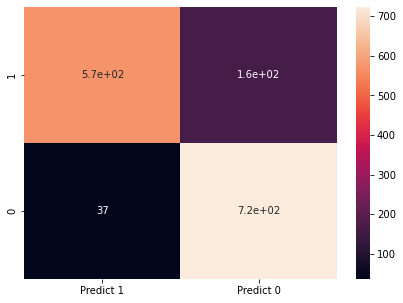

In [527]:
# Confusion Matrix for balanced Test Data Predictions

balanced_cm=metrics.confusion_matrix(y_balanced_test, y_balanced_test_pred, labels=[1, 0])

df_churn_balanced_cm = pd.DataFrame(balanced_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_churn_balanced_cm, annot=True)

In [528]:
# Performance Metric Values For XGBoost Balanced Model Training and Test Set
print("Classification Report For XGBoost Balanced Model applied to Training Set:\n\n", classification_report(y_balanced_train,y_balanced_train_pred))
print('-'*75)
print("Classification Report For XGBoost Balanced Model applied to Testing Set:\n\n", classification_report(y_balanced_test,y_balanced_test_pred))

Classification Report For XGBoost Balanced Model applied to Training Set:

               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2978
           1       0.93      0.77      0.84      3002

    accuracy                           0.86      5980
   macro avg       0.87      0.86      0.86      5980
weighted avg       0.87      0.86      0.86      5980

---------------------------------------------------------------------------
Classification Report For XGBoost Balanced Model applied to Testing Set:

               precision    recall  f1-score   support

           0       0.82      0.95      0.88       760
           1       0.94      0.78      0.85       736

    accuracy                           0.87      1496
   macro avg       0.88      0.86      0.86      1496
weighted avg       0.88      0.87      0.86      1496



# PART B

In [529]:
def merge(df1,df2): # function to merge dataset1 and dataset2 and return the merged dataset
    df_merge = pd.merge(df1,df2,how='outer',on='customerID') # calling the library in-built dataframe merge function
    return df_merge

def data_preparation(): # function with logic for reading in Dataset1 & 2 .csv files as dataframe and merging them to form a single dataset
    df_churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv') # read dataset1 into a variable
    df_churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv', na_values =' ') # read dataset2 into a variable with all ' ' replaced with NA value
    df_churn = merge(df_churn1,df_churn2) # calling the function to merge dataset1 and dataset2
    df_churn = df_churn.drop(['customerID'], axis = 1) # dropping column 'customerID' from the merged dataset as its not helpful in predictions
    df_churn.head() # first 5 rows of the final merged dataset
    return df_churn,df_churn1,df_churn2

In [530]:
def shape(df): # function for sgare/size/rows vs columns for any dataset
    return df.shape

def df_col_compare(df1,df2,df_merge):
    list1 = df1.columns # store column values of dataset1 in a list
    list2 = df2.columns # store column values of dataset2 in a list
    list3 = df_merge.columns # store column values of the merged list
    print("-"*75)
    for i in range(9): # for loop for iterating through dataset1 and merged dataset column names to compare them with each other
        if list1[i+1] == list3[i]: # column name equality check
                print('Dataframe 1 column name', list1[i+1], 'present in the final Merged Dataframe') # print they match
        else:
            print('Dataframe 1 column name', list1[i+1], 'not present in the final Merged Dataframe') # print they dont mactch
    print("\n")
    for i in range(11): # for loop for iterating through dataset2 and merged dataset column names to compare them with each other
        if list2[i+1] == list3[i+9]: # column name equality check
            print('Dataframe 2 column name', list2[i+1], 'present in the final Merged Dataframe') # print they match
        else:
            print('Dataframe 2 column name',list2[i+1], 'not present in the final Merged Dataframe') # print they dont match

# Unique Values in Each Column to check for any invalid values
def unique_value_count(df_merge):
    print("\n\n Unique Column Values :\n\n")
    for (columnName, columnData) in df_merge.iteritems(): # for loop to iterate through the columns in the dataset to display the unique values and their count per column
        print(columnName, ":", df_merge[columnName].unique(), "\n Number Of Unique Values  : ",df_merge[columnName].nunique(),"\n\n")

           
def data_exploration(df_churn,df_churn1,df_churn2):
    array1 = shape(df_churn1) # storing rows vs column size for dataset1 in a variable
    print("Dataset1 Rows x Columns = ",array1) # printing the dataset1 after changes
    array2 = shape(df_churn2) # storing rows vs column size for dataset2 in a variable
    print("Dataset2 Rows x Columns = ",array2)# printing the dataset2 after changes
    array3 = shape(df_churn) # storing rows vs column size for merged dataset in a variable
    print("Dataset Final Rows x Columns = ",array3)# printing the merged dataset after changes
    df_col_compare(df_churn1,df_churn2,df_churn) # calling the function for column comparison between datasets
    print("-"*75)
    print("Data type of each column \n\n", df_churn.dtypes) # checking for every column datatype
    print("-"*75)
    unique_value_count(df_churn) # Calling function defined for fing unique values and their numbers

In [531]:
# Checking for total missing values in each column of df_churn and replacing with mean for continuous features/mode values for categorical features
def replace_NullValues(df_merge):
    df_merge[['tenure']] = df_merge[['tenure']].astype('float64') # convert tenure datatype to float64 since its a continuous feature
    for column in df_merge: # iterate through the columns in the dataset
        if df_merge[column].isnull().values.any(): # check for any null values under each column
            if (df_merge[column].isnull().sum()/len(df_merge[column])*100) > 50: # if the percentage of null values is greater than 50 then drop the column from the dataset
                df_merge.drop([column], axis = 1)
            else:
                if df_merge[column].dtypes == np.float64: # if percantage of null values is less than 50, then check if datatype of column is float
                    df_merge[column]= df_merge[column].fillna(df_merge[column].mean()) # if column datatype is float, then replace all null values in the column with mean of the column values
                else:
                    df = df_merge[column].value_counts().sort_values(ascending=False) # If column datatype is any other - object/int64 then check for the value in the column with highest number of row values
                    df_merge[column]= df_merge[column].fillna(df[1].index) # replace all null values in the categorical columns with the mode value of the column
                    
    return df_merge

def data_cleaning(df_churn): # function containing the Data Cleaning logic
    print("-"*75)
    print("Total Null values under each column in the dataset \n\n", df_churn.isnull().sum()) # calling the library inbuilt functions to print total null values
    df_churn = replace_NullValues(df_churn) # calling the function for replacing the null values
    print("-"*75)
    print("Total Null values under each column in the dataset after imputing them \n\n", df_churn.isnull().sum()) # calling the functions for rechecking to print total null values if any post imputation step
    print("-"*75)

In [532]:
def piechart(df_churn_fn): # function containing the logic for pie chart visualization of each categorical feature from the dataset
    font1 = {'family': 'Tahoma',
        'color':  'brown',
        'weight': 'bold',
        'size': 20,
        }
    for col in df_churn_fn.columns: # for loop to iterate through the categorical columns in the dataset
        plt.figure(figsize=(8,15))
        df_churn_fn.groupby(col).size().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20},colors=['violet', 'lime','red','yellow'],label="") # groupby each column by their categories and plot the pie chart
        plt.title(col, fontdict = font1)

def visualization(df_churn): # function containing the pie-chart visualization logic
    df_churn_cat = pd.DataFrame()
    df_churn_cat = df_churn[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]
    piechart(df_churn_cat) # calling the piechart function for pie chart visualization with each categorical feature

In [533]:
def OneHot_Encoding (df_merge): # Function defined for One Hot Encoding the Nominal features gender and PaymentMethod
    oneHotCols=["gender","PaymentMethod"]
    df_merge = pd.get_dummies(df_merge, columns=oneHotCols, drop_first=True) # calling the library in-built function to get dummy variables for nominal features
    return df_merge

def Label_Encoding (df_merge): # Function defined for Label Encoding the Ordinal features
    replaceStruct = {"Partner":{"Yes":1, "No":0} ,
                 "Dependents":{"No":0, "Yes":1}, 
                 "PhoneService":{"No":0, "Yes":1},
                 "MultipleLines":{"No phone service":0, "No":1, "Yes":2},
                 "InternetService":{"No":0, "DSL":1, "Fiber optic":2},
                 "OnlineSecurity":{"No internet service":0, "No":1, "Yes":2},
                 "OnlineBackup":{"No internet service":0,"No":1, "Yes":2},
                 "DeviceProtection":{"No internet service":0, "No":1, "Yes":2},
                 "TechSupport":{"No internet service":0, "No":1, "Yes":2},
                 "StreamingTV":{"No internet service":0, "No":1, "Yes":2},
                 "StreamingMovies":{"No internet service":0, "No":1, "Yes":2},
                 "Contract":{"Month-to-month":1, "One year":2, "Two year":3}, 
                 "PaperlessBilling":{"Yes":1, "No":0},
                 "Churn":{"No":0, "Yes":1} } # dictionary created for all the ordinal features with class labels assigned
    
    df_merge = df_merge.replace(replaceStruct) # replace pre-defined function for replacing all numerical and string values with class labels
    return df_merge


def Xy_Split(df_merge): # X and y data split function defined
    X = df_merge.drop(['Churn'], axis=1)
    y = df_merge[['Churn']]
    return (X,y)

def Standardization(X_df): # function defined to standardize X dataset based on z-scores
    X_df = X_df.apply(zscore)
    return X_df

def Train_Test_Split(XScaled_fn, y_fn): # function containing Train-Test split logic
    X_train_fn, X_test_fn, y_train_fn, y_test_fn = train_test_split(XScaled_fn, y_fn, test_size=.20, random_state=42) # calling library in-built train & test split function
    return (X_train_fn, X_test_fn, y_train_fn, y_test_fn) # returning the X & Y, train and test sets

def data_transformation(df_churn): # Function containing Data Transformation logic
    df_churn = OneHot_Encoding(df_churn) # Calling the user-defined function for One Hot Encoding
    df_churn = Label_Encoding(df_churn) # Calling the user-defined function for Label Encoding
    print("Final Dataset \n\n", df_churn.head(5))
    array = Xy_Split(df_churn) # Calling X and y split function
    XScaled = Standardization(array[0]) # Calling Function to standardize X dataset
    X_train, X_test, y_train, y_test = Train_Test_Split(XScaled, array[1]) # Calling Function to split XScaled and y dataset into Train and Test sets
    print("-"*75)
    print("Scaled X Dataset \n\n", XScaled.head())
    return X_train, X_test, y_train, y_test

In [534]:
def fit_model_predict(X_train_fn, X_test_fn, y_train_fn, y_test_fn, model_fn): # Function defined to predict target variable from train and test data
    model_fn.fit(X_train_fn, y_train_fn)
    y_test_predict_fn = model_fn.predict(X_test_fn) # predict on test set
    y_train_predict_fn = model_fn.predict(X_train_fn) # predict on train set
    return (y_test_predict_fn, y_train_predict_fn)
    
    
def TrainBaseModels (X_train, X_test, y_train, y_test): #Function defined to Train Base Models
    model_log = LogisticRegression() # solver="liblinear", Logistic Regression model creation 
    (y_test_pred_log, y_train_pred_log) = fit_model_predict(X_train, X_test, y_train, y_test, model_log) # Fit Logistic regression model on train dataset and predict from train and test data
    
    model_knn = KNeighborsClassifier()# KNN model creation 
    (y_test_pred_knn, y_train_pred_knn) = fit_model_predict(X_train, X_test, y_train, y_test, model_knn) # Fit KNN model on train dataset and predict from train and test data
    
    model_svm = svm.SVC()# SVM model creation 
    (y_test_pred_svm, y_train_pred_svm) = fit_model_predict(X_train, X_test, y_train, y_test, model_svm) # Fit SVM model on train dataset and predict from train and test data
    
    model_gnb = GaussianNB() # GNB model creation
    (y_test_pred_gnb, y_train_pred_gnb) = fit_model_predict(X_train, X_test, y_train, y_test, model_gnb) # Fit Gaussian Naive Bayes model on train dataset and predict from train and test data

    model_rf = RandomForestClassifier() # Random Forest model creation
    (y_test_pred_rf, y_train_pred_rf) = fit_model_predict(X_train, X_test, y_train, y_test, model_rf) # Fit Random Forest model on train dataset and predict from train and test data
    
    model_adb = AdaBoostClassifier() # Adaboost model creation
    (y_test_pred_adb, y_train_pred_adb) = fit_model_predict(X_train, X_test, y_train, y_test, model_adb) # Fit Ada Boost model on train dataset and predict from train and test data

    model_xgb = XGBClassifier() # XGBoost Model Creation
    (y_test_pred_xgb, y_train_pred_xgb) = fit_model_predict(X_train, X_test, y_train, y_test, model_xgb) # Fit XGBoost model on train dataset and predict from train and test data

    Y_array = [y_test, y_train, y_test_pred_log, y_train_pred_log, y_test_pred_knn, y_train_pred_knn,
               y_test_pred_svm, y_train_pred_svm, y_test_pred_gnb, y_train_pred_gnb, y_test_pred_rf, y_train_pred_rf,
               y_test_pred_adb, y_train_pred_adb, y_test_pred_xgb, y_train_pred_xgb]
    return Y_array,model_adb

In [535]:
def confusion_matrix(y_test_fn, y_test_pred_fn, text): # Confusion Matix Based on Predictions
    cm = metrics.confusion_matrix(y_test_fn, y_test_pred_fn, labels=[1, 0])
    df_churn_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    font1 = {'family': 'Tahoma',
        'color':  'brown',
        'weight': 'bold',
        'size': 15,
        }
    plt.title(text, fontdict = font1)
    sns.heatmap(df_churn_cm, annot=True)

def Performance_Metrics(y_fn,y_pred_fn) : # Performance Parameters for each base model through classification report
    CR= classification_report(y_fn,y_pred_fn) # Classification report pre-defined function called
    return CR

def performance_analysis(Y_array): # Function executing the performance analysis logic
    confusion_matrix(Y_array[0], Y_array[2], "Logistic Reg Model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For Logistic Regression Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[3]))
    print('-'*75)
    print("Classification Report For Logistic Regression Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[2]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[4], "KNN Model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For KNN Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[5]))
    print('-'*75)
    print("Classification Report For KNN Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[4]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[6], "SVM Model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For SVM Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[7]))
    print('-'*75)
    print("Classification Report For SVM Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[6]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[8], "Gaussian NB model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For Gaussian NB Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[9]))
    print('-'*75)
    print("Classification Report For Gaussian NB Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[8]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[10], "Random Forest model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For Random Forest Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[11]))
    print('-'*75)
    print("Classification Report For Random Forest Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[10]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[12], "AdaBoost model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For AdaBoost Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[13]))
    print('-'*75)
    print("Classification Report For AdaBoost Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[12]))
    print('-'*75)
    
    confusion_matrix(Y_array[0], Y_array[14], "XGBoost model Confusion Matrix") # Calling defined Confusion Matrix for the predicted testing target data
    print("Classification Report For XGBoost Base Model applied to Training Set:\n\n", Performance_Metrics(Y_array[1], Y_array[15]))
    print('-'*75)
    print("Classification Report For XGBoost Base Model applied to Testing Set:\n\n", Performance_Metrics(Y_array[0], Y_array[14]))
    print('-'*75)

In [536]:
# create an iterator object with write permission - model.pkl to save the Adaboost model as pickle file under a separate defined function
def pickle_model(model):
    pickle.dump(model, open('model.pkl', 'wb'))

Dataset1 Rows x Columns =  (7043, 10)
Dataset2 Rows x Columns =  (7043, 12)
Dataset Final Rows x Columns =  (7043, 20)
---------------------------------------------------------------------------
Dataframe 1 column name gender present in the final Merged Dataframe
Dataframe 1 column name SeniorCitizen present in the final Merged Dataframe
Dataframe 1 column name Partner present in the final Merged Dataframe
Dataframe 1 column name Dependents present in the final Merged Dataframe
Dataframe 1 column name tenure present in the final Merged Dataframe
Dataframe 1 column name PhoneService present in the final Merged Dataframe
Dataframe 1 column name MultipleLines present in the final Merged Dataframe
Dataframe 1 column name InternetService present in the final Merged Dataframe
Dataframe 1 column name OnlineSecurity present in the final Merged Dataframe


Dataframe 2 column name OnlineBackup present in the final Merged Dataframe
Dataframe 2 column name DeviceProtection present in the final Mer

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

Classification Report For Logistic Regression Base Model applied to Training Set:

               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634

---------------------------------------------------------------------------
Classification Report For Logistic Regression Base Model applied to Testing Set:

               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

---------------------------------------------------------------------------
Classification Report For K

C:\Users\HP\AppData\Local\Temp/ipykernel_12612/282317900.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (7,5))


Classification Report For Gaussian NB Base Model applied to Training Set:

               precision    recall  f1-score   support

           0       0.90      0.71      0.79      4138
           1       0.49      0.79      0.61      1496

    accuracy                           0.73      5634
   macro avg       0.70      0.75      0.70      5634
weighted avg       0.79      0.73      0.74      5634

---------------------------------------------------------------------------
Classification Report For Gaussian NB Base Model applied to Testing Set:

               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

---------------------------------------------------------------------------
Classification Report For Random Forest Bas

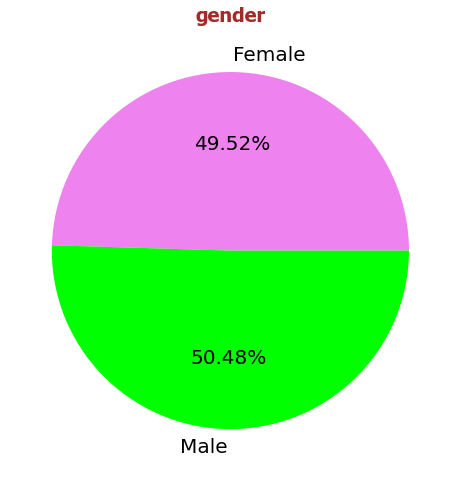

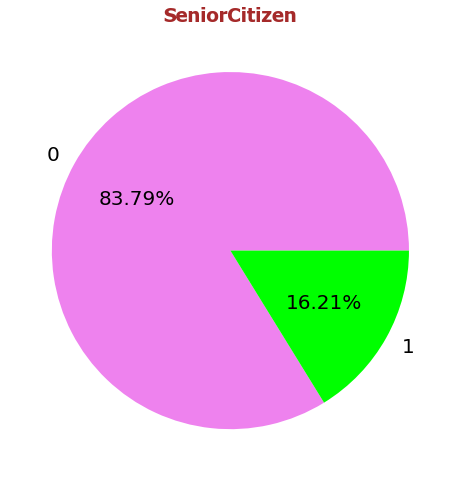

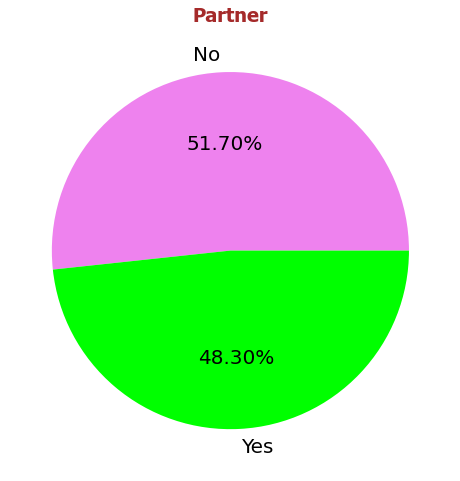

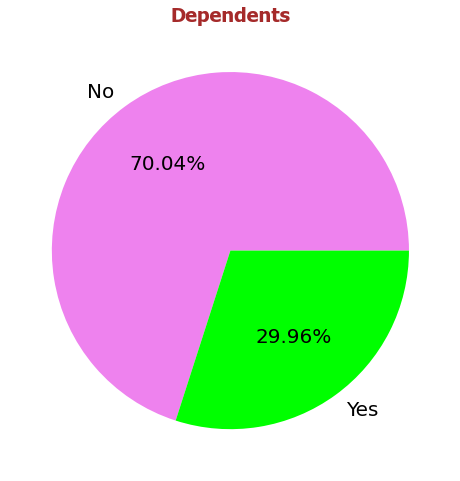

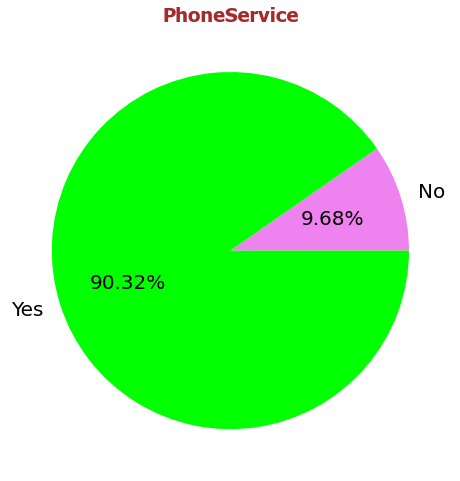

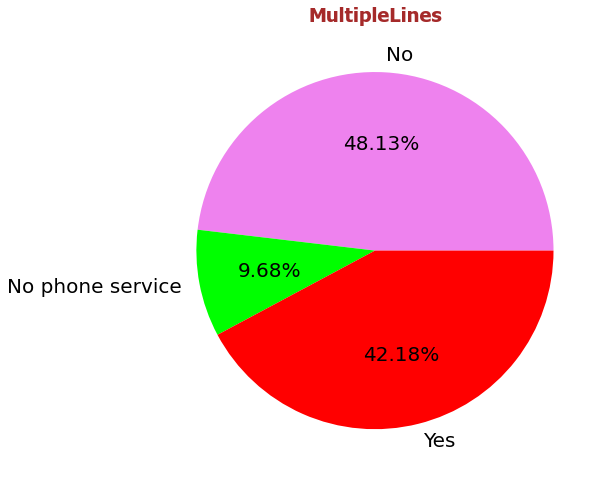

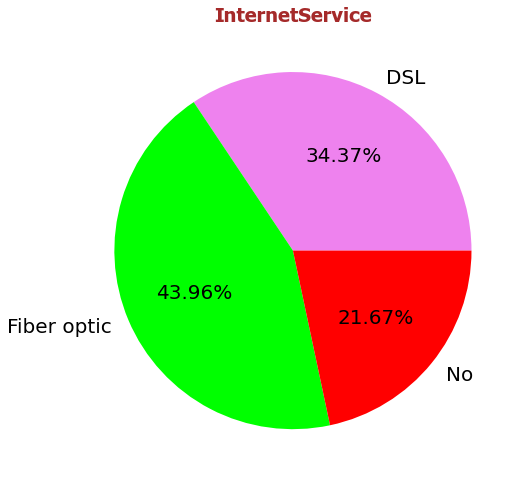

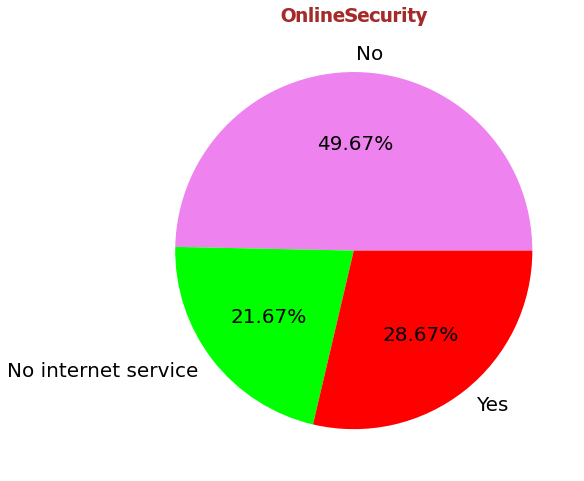

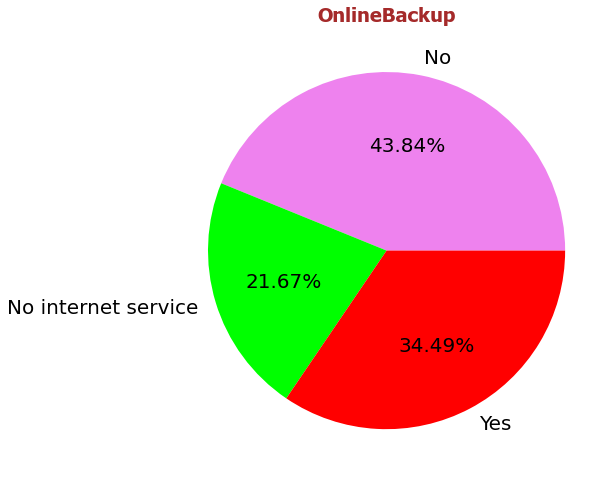

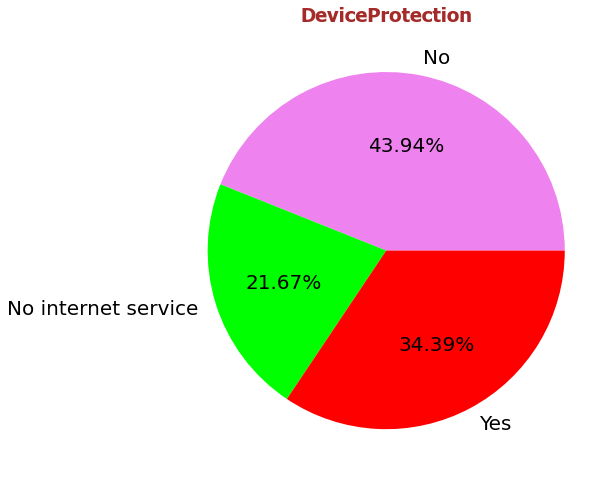

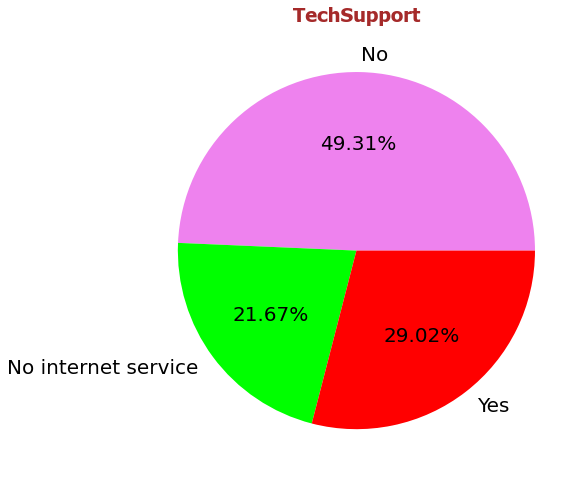

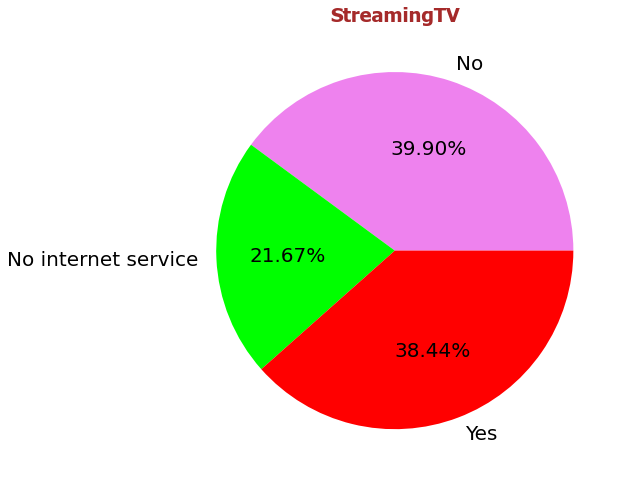

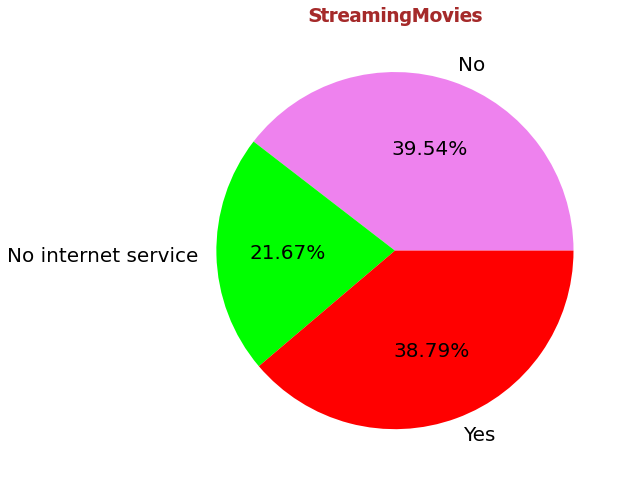

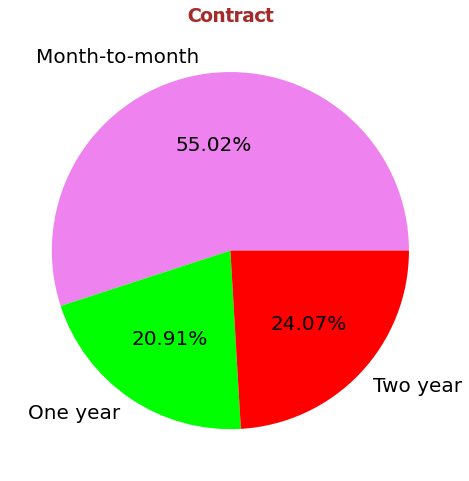

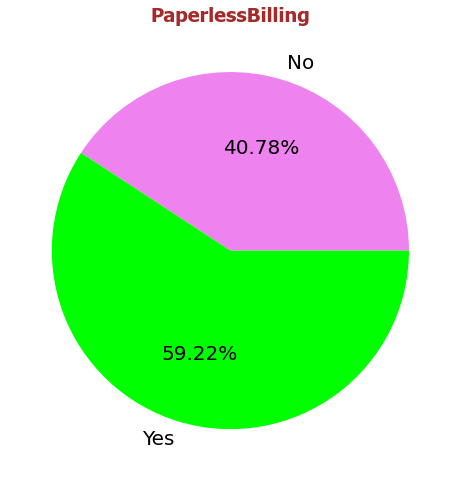

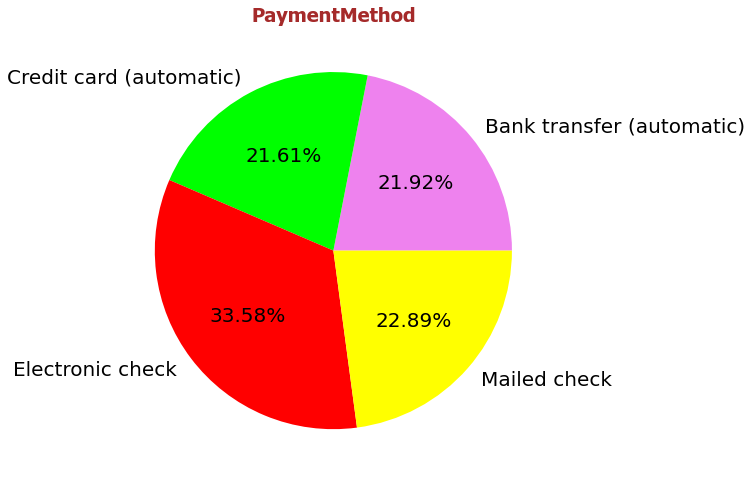

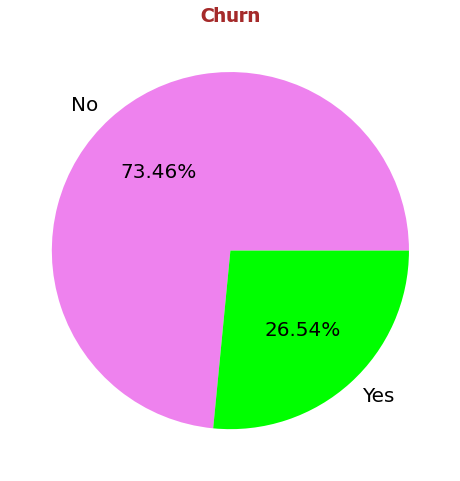

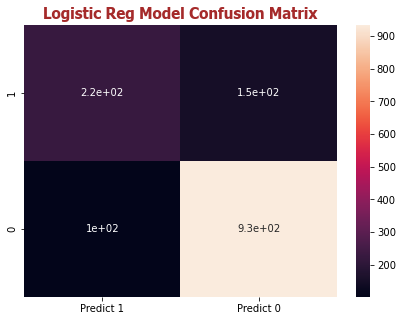

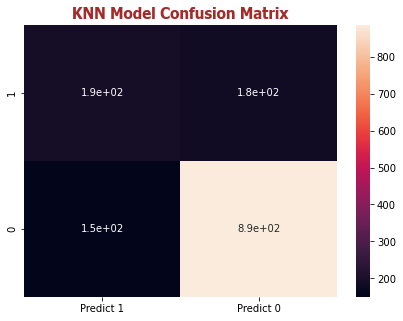

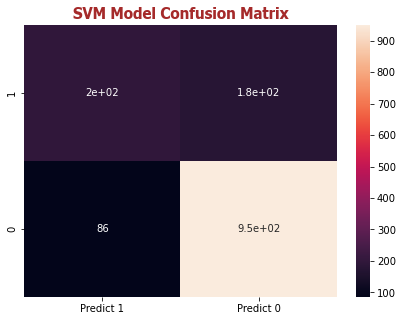

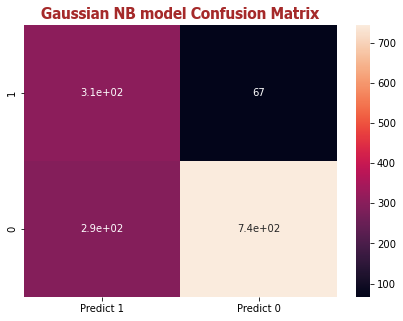

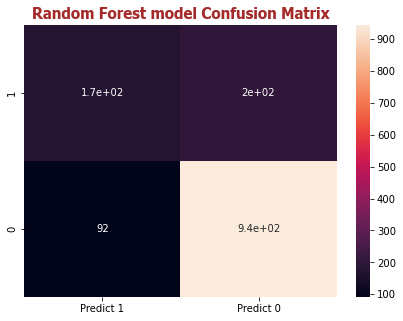

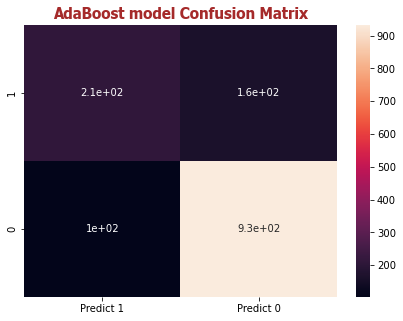

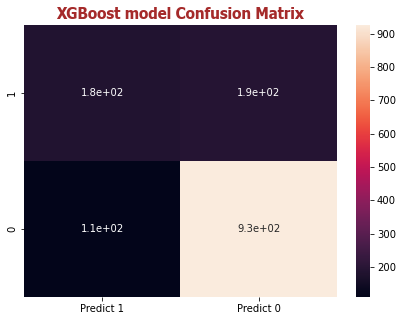

In [537]:
def main():
    df_churn,df_churn1,df_churn2 = data_preparation() # calling data preparation function that creates the merged dataset from dataset1 and 2 and returing all 3
    data_exploration(df_churn,df_churn1,df_churn2) # calling data exploration function to understand the data better
    data_cleaning(df_churn) # calling function for data cleanup
    visualization(df_churn) # calling function for data interpretation through visualization
    X_train, X_test, y_train, y_test = data_transformation(df_churn) # calling function for transforming data, getting it ready for predictions and spliting it into X & Y, then into train and test sets. Returns the train and test data X & Y data
    Y_array,model = TrainBaseModels (X_train, X_test, y_train, y_test) # calling function to create different models and train the train dataset. Returns an aray of the Y test and train data both predicted and otherwise for all models trained
    performance_analysis(Y_array) # calling function for analysis of peformance for different ML and Ensemble models
    pickle_model(model) # calling function for storing the best performing model (Adaboost here) as a pickle file
    
if __name__=="__main__":
    main() # call to the main function